In [1]:
import sys
sys.path.append('../')  # Para encontrar carpetas

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, average_precision_score,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
)

from utils.metrics import calculate_metrics
from utils.random_seed import set_seed

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

set_seed(5)

Using device: cuda


In [3]:
X_train_df = pd.read_csv("../../data/metilacion_nm.csv", index_col=0)
y_train_raw = pd.read_csv("../../data/labels.csv", index_col=0).iloc[:, 0].values
label_mapping_nm = {'Nevus': 0, 'Melanoma': 1}
y_train = np.array([label_mapping_nm[label] for label in y_train_raw])
feature_names = X_train_df.columns.tolist()
X_train = X_train_df.values
X_train_scaled = X_train / 100

In [4]:
X_train_df.head()

,156186305,156186313,156186321,156186325,156186342,156186356,156186357,156186358,156186359,156186375,...,69,72.1,75,76,79,80,83,84,87,88
18B13387,11.373671,10.867598,14.055282,21.170409,23.345484,5.290853,0.117268,9.289617,3.094445,5.349425,...,0.631151,1.249594,0.017349,0.000000,1.548055,0.947549,0.720343,0.0,0.019846,0.000000
18B2795,47.451735,29.009670,34.580896,33.083526,25.681129,15.870852,15.949583,21.737521,22.653662,20.112132,...,0.039108,0.000000,0.000000,0.032150,0.000000,2.743285,3.061862,0.0,0.541545,0.000000
17B25620,57.289880,44.306507,36.287625,46.039604,32.319894,13.771865,18.107057,17.125155,27.727205,19.114350,...,0.035398,0.040519,0.000000,0.000000,0.000000,0.000000,3.237858,0.0,0.000000,0.000000
15B744,59.362809,27.294192,40.876844,38.203370,28.490648,21.537592,23.189354,24.095683,24.033392,0.000000,...,0.009384,0.015509,0.000000,0.000000,0.037893,0.075758,0.296626,0.0,7.613797,0.182482
18B7048,32.332706,31.588237,23.390077,22.074986,19.222065,8.418182,10.233941,13.757971,15.698416,15.168765,...,0.231275,0.026120,0.000000,0.844954,0.074380,0.000000,1.488479,0.0,0.000000,0.000000


In [5]:
print(X_train_scaled)

[[1.13736708e-01 1.08675979e-01 1.40552818e-01 ... 0.00000000e+00
  1.98463710e-04 0.00000000e+00]
 [4.74517351e-01 2.90096699e-01 3.45808956e-01 ... 0.00000000e+00
  5.41544638e-03 0.00000000e+00]
 [5.72898799e-01 4.43065068e-01 3.62876254e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.49271991e-01 3.23723759e-01 3.19732830e-01 ... 3.11007251e-02
  7.56835602e-04 0.00000000e+00]
 [2.30431245e-01 1.18105719e-01 1.46474743e-01 ... 0.00000000e+00
  2.47781763e-04 0.00000000e+00]
 [0.00000000e+00 3.23242689e-01 0.00000000e+00 ... 0.00000000e+00
  8.93611883e-04 0.00000000e+00]]


TABNET 4 FOLDS UMBRAL FIJO (0,5)

Fold 1
epoch 0  | loss: 0.90473 | val_0_auc: 0.33333 |  0:00:00s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 10 | loss: 0.43132 | val_0_auc: 0.44444 |  0:00:00s
epoch 20 | loss: 0.61489 | val_0_auc: 0.66667 |  0:00:01s
epoch 30 | loss: 0.23514 | val_0_auc: 0.66667 |  0:00:01s
epoch 40 | loss: 1.18844 | val_0_auc: 0.77778 |  0:00:02s
epoch 50 | loss: 0.83982 | val_0_auc: 0.66667 |  0:00:02s
epoch 60 | loss: 0.35524 | val_0_auc: 0.55556 |  0:00:03s

Early stopping occurred at epoch 63 with best_epoch = 43 and best_val_0_auc = 1.0
Fold 1 metrics:
  ACC: 0.6667
  SEN: 0.3333
  SPE: 1.0000
  PPV: 1.0000
  NPV: 0.6000
  F1: 0.5000
  AUC: 0.6667
  AUC_PR: 0.6667


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


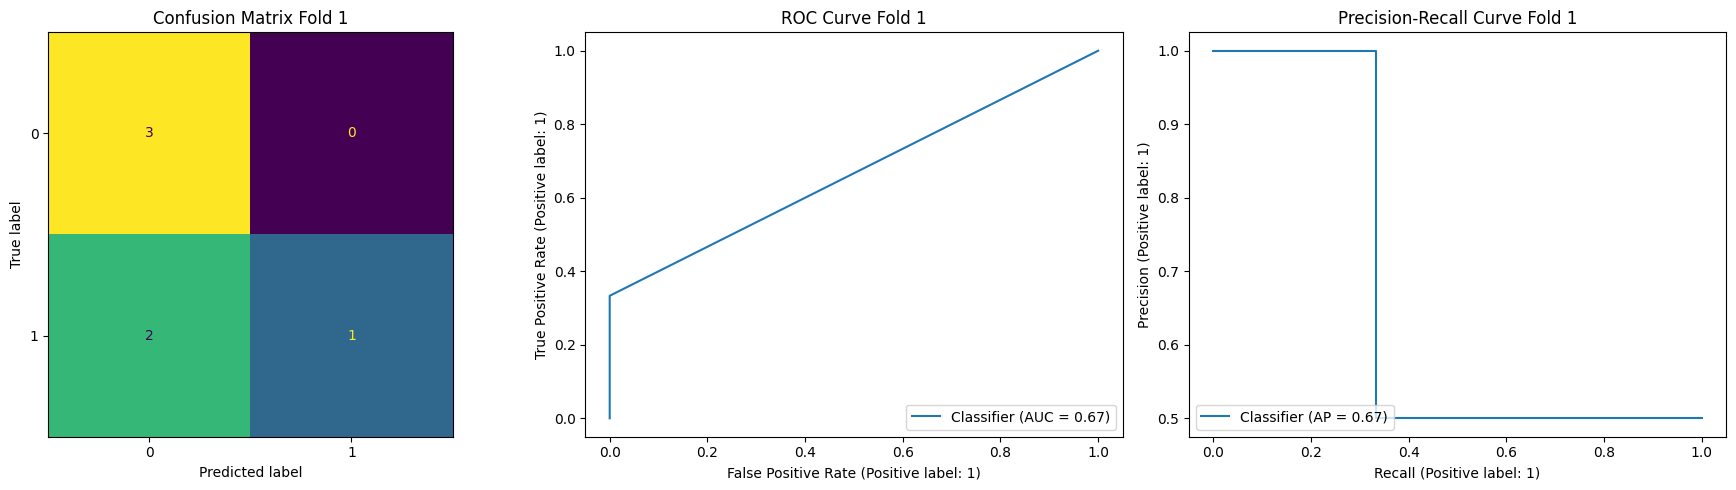

Fold 2
epoch 0  | loss: 0.78062 | val_0_auc: 0.5     |  0:00:00s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 10 | loss: 0.46906 | val_0_auc: 0.66667 |  0:00:00s
epoch 20 | loss: 0.68956 | val_0_auc: 0.83333 |  0:00:01s

Early stopping occurred at epoch 24 with best_epoch = 4 and best_val_0_auc = 1.0
Fold 2 metrics:
  ACC: 0.4000
  SEN: 1.0000
  SPE: 0.0000
  PPV: 0.4000
  NPV: 0.0000
  F1: 0.5714
  AUC: 0.5000
  AUC_PR: 0.4000


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


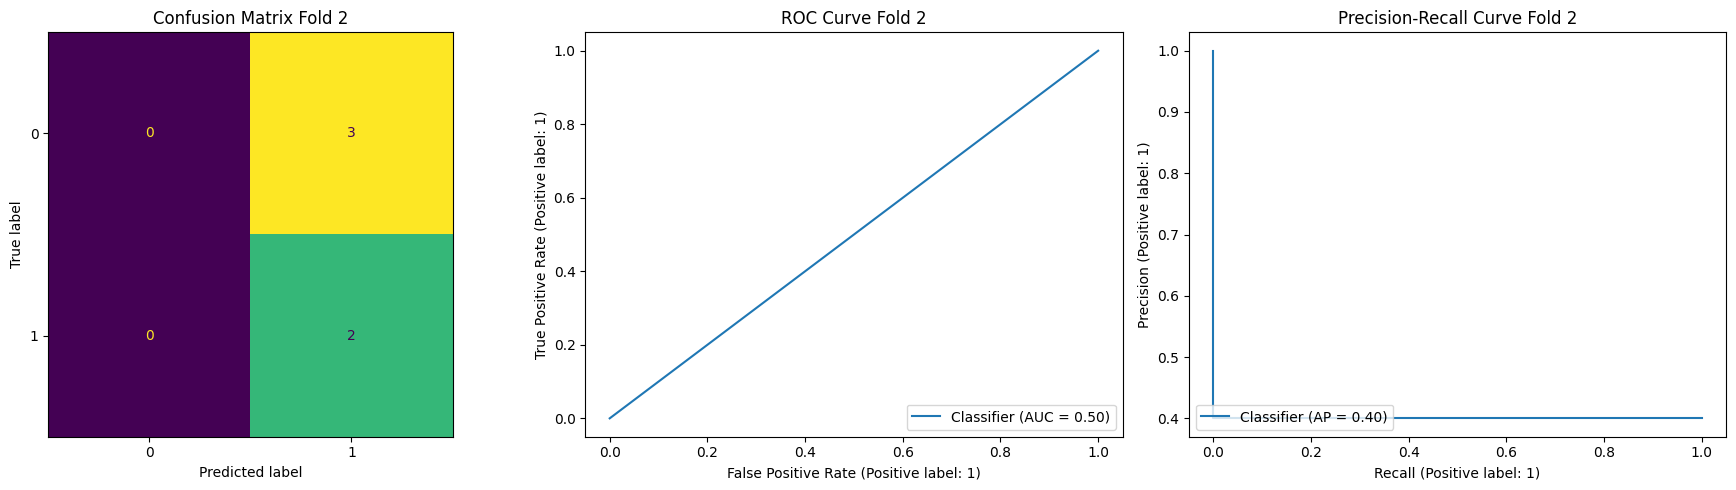

Fold 3
epoch 0  | loss: 0.61315 | val_0_auc: 1.0     |  0:00:00s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 10 | loss: 0.63577 | val_0_auc: 0.66667 |  0:00:00s
epoch 20 | loss: 0.82466 | val_0_auc: 0.83333 |  0:00:01s

Early stopping occurred at epoch 20 with best_epoch = 0 and best_val_0_auc = 1.0
Fold 3 metrics:
  ACC: 1.0000
  SEN: 1.0000
  SPE: 1.0000
  PPV: 1.0000
  NPV: 1.0000
  F1: 1.0000
  AUC: 1.0000
  AUC_PR: 1.0000


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


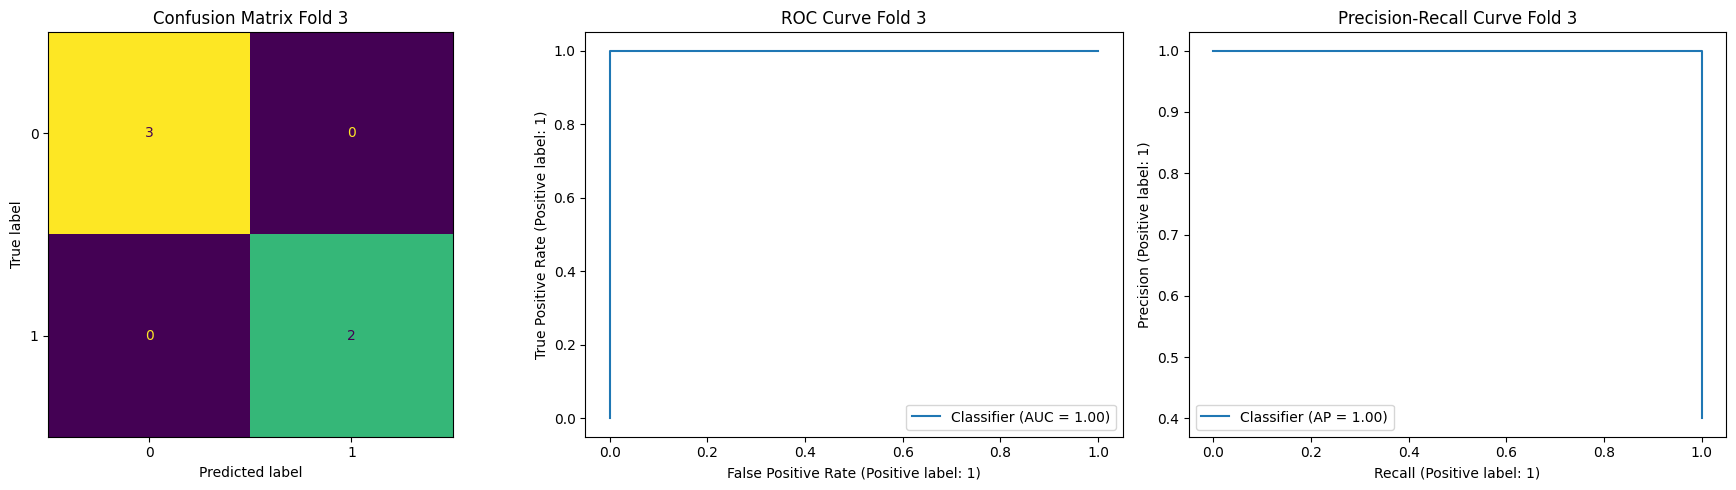

Fold 4
epoch 0  | loss: 1.05866 | val_0_auc: 0.5     |  0:00:00s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 10 | loss: 0.80613 | val_0_auc: 0.5     |  0:00:00s
epoch 20 | loss: 0.95236 | val_0_auc: 0.83333 |  0:00:01s

Early stopping occurred at epoch 21 with best_epoch = 1 and best_val_0_auc = 1.0
Fold 4 metrics:
  ACC: 0.8000
  SEN: 0.5000
  SPE: 1.0000
  PPV: 1.0000
  NPV: 0.7500
  F1: 0.6667
  AUC: 0.7500
  AUC_PR: 0.7000


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


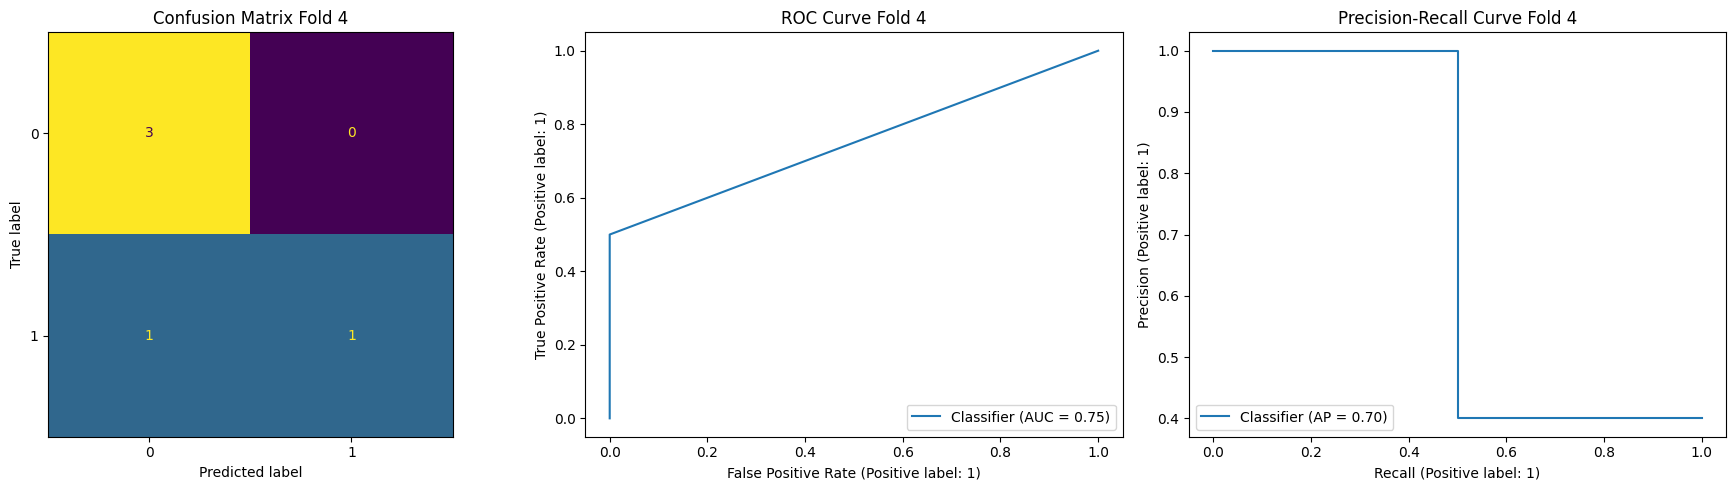


📊 Métricas globales (todas las validaciones juntas):
ACC: 0.7143
SEN: 0.6667
SPE: 0.7500
PPV: 0.6667
NPV: 0.7500
F1: 0.6667
AUC: 0.7222
AUC_PR: 0.7200

📊 Métricas por Fold (media ± std):
ACC: 0.7167 ± 0.2179
SEN: 0.7083 ± 0.2976
SPE: 0.7500 ± 0.4330
PPV: 0.8500 ± 0.2598
NPV: 0.5875 ± 0.3681
F1: 0.6845 ± 0.1915
AUC: 0.7292 ± 0.1804
AUC_PR: 0.6917 ± 0.2126


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
from pytorch_tabnet.tab_model import TabNetClassifier

# Supongo que tienes calculate_metrics definido ya (como antes)

X = X_train_scaled.astype(np.float32)
y = y_train.astype(np.int64)

n_splits = 4
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=5)

metrics_per_fold = {
    "ACC": [],
    "SEN": [],
    "SPE": [],
    "PPV": [],
    "NPV": [],
    "F1": [],
    "AUC": [],
    "AUC_PR": []
}

all_y_true = []
all_y_proba = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    set_seed(5)
    print(f"Fold {fold}")

    X_tr, X_val = X[train_idx], X[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    clf = TabNetClassifier(
        n_d=32, n_a=32, n_steps=3,
        gamma=1.5,
        lambda_sparse=1e-4,
        optimizer_params=dict(lr=0.01),
        mask_type='entmax',
        verbose=10
    )

    clf.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        max_epochs=100,
        patience=20,
        batch_size=4,
        drop_last=True
    )

    y_pred = clf.predict(X_val)
    y_proba = clf.predict_proba(X_val)[:, 1]

    all_y_true.extend(y_val)
    all_y_proba.extend(y_proba)

    metrics = calculate_metrics(np.array(y_val), np.array(y_pred))
    for key in metrics_per_fold.keys():
        metrics_per_fold[key].append(metrics[key])

    print(f"Fold {fold} metrics:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    # Matriz de confusión
    cm = confusion_matrix(y_val, y_pred)
    disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp_cm.plot(ax=axs[0], colorbar=False)
    axs[0].set_title(f'Confusion Matrix Fold {fold}')

    # Curva ROC
    roc_disp = RocCurveDisplay.from_predictions(y_val, y_proba, ax=axs[1])
    axs[1].set_title(f'ROC Curve Fold {fold}')

    # Curva Precision-Recall
    pr_disp = PrecisionRecallDisplay.from_predictions(y_val, y_proba, ax=axs[2])
    axs[2].set_title(f'Precision-Recall Curve Fold {fold}')

    plt.tight_layout()
    plt.show()

all_y_true = np.array(all_y_true)
all_y_proba = np.array(all_y_proba)

global_metrics = calculate_metrics(all_y_true, all_y_proba, threshold=0.5)

print("\n📊 Métricas globales (todas las validaciones juntas):")
for metric_name, metric_value in global_metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

print("\n📊 Métricas por Fold (media ± std):")
for metric_name, values in metrics_per_fold.items():
    mean_val = np.mean(values)
    std_val = np.std(values)
    print(f"{metric_name}: {mean_val:.4f} ± {std_val:.4f}")


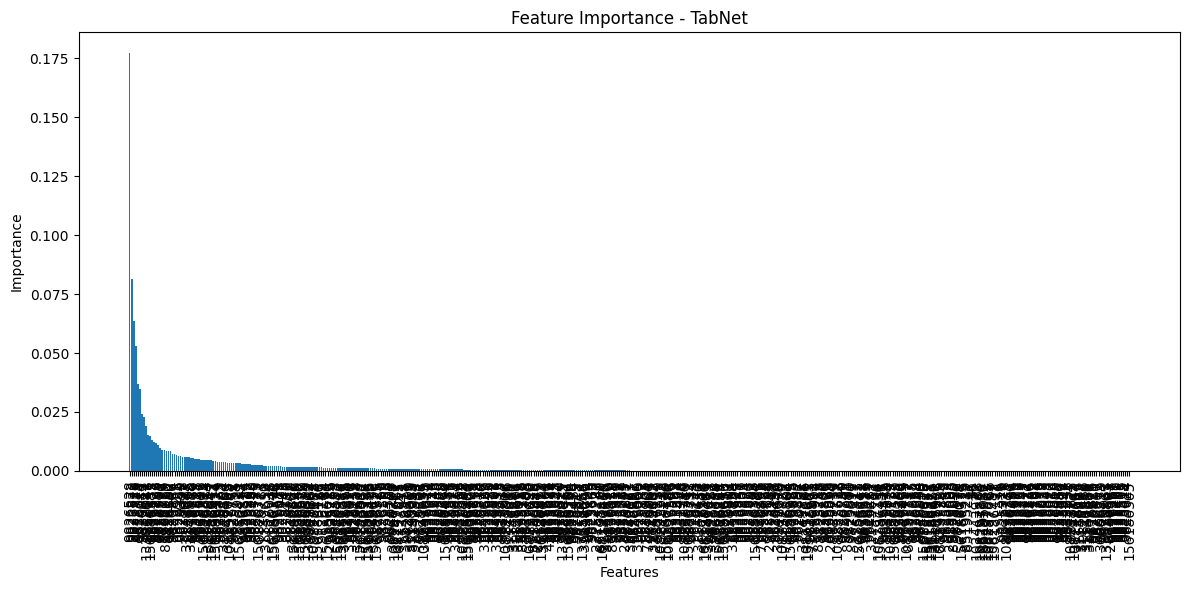

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# feature_importances_ es un array con la importancia de cada feature
importances = clf.feature_importances_

# Supongamos que feature_names es la lista de nombres de tus columnas
# Asegúrate de que importances y feature_names tengan la misma longitud
assert len(importances) == len(feature_names)

# Ordenar features por importancia (opcional, para mejor visualización)
indices = np.argsort(importances)[::-1]  # índices de mayor a menor importancia
sorted_importances = importances[indices]
sorted_features = [feature_names[i] for i in indices]

# Graficar
plt.figure(figsize=(12,6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.title("Feature Importance - TabNet")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

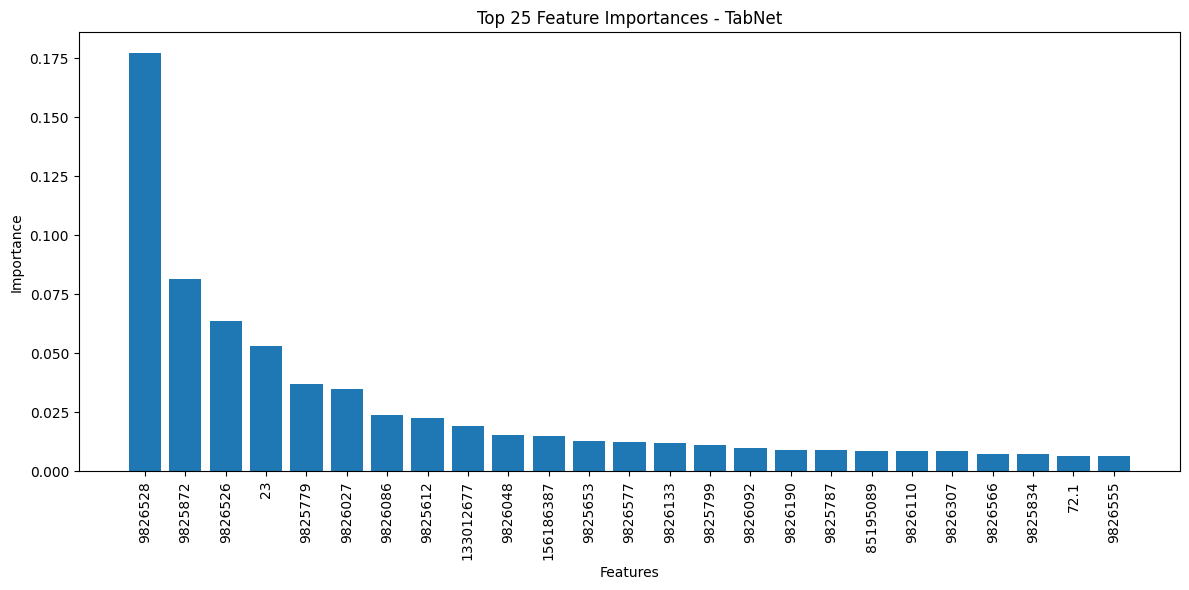

Top 20 features más importantes (de mayor a menor):
9826528: 0.1771
9825872: 0.0814
9826526: 0.0637
23: 0.0530
9825779: 0.0369
9826027: 0.0348
9826086: 0.0240
9825612: 0.0227
133012677: 0.0192
9826048: 0.0151
156186387: 0.0148
9825653: 0.0130
9826577: 0.0123
9826133: 0.0118
9825799: 0.0111
9826092: 0.0097
9826190: 0.0091
9825787: 0.0088
85195089: 0.0086
9826110: 0.0084
9826307: 0.0084
9826566: 0.0071
9825834: 0.0071
72.1: 0.0066
9826555: 0.0065


In [8]:
import matplotlib.pyplot as plt
import numpy as np

importances = clf.feature_importances_
assert len(importances) == len(feature_names)

# Número de features que quieres mostrar
top_n = 25

# Ordenar features por importancia descendente
indices = np.argsort(importances)[::-1]

# Seleccionar solo las top_n más importantes
top_indices = indices[:top_n]
top_importances = importances[top_indices]
top_features = [feature_names[i] for i in top_indices]

# Graficar solo las top_n features
plt.figure(figsize=(12,6))
plt.bar(range(top_n), top_importances)
plt.xticks(range(top_n), top_features, rotation=90)
plt.title(f"Top {top_n} Feature Importances - TabNet")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

print("Top 20 features más importantes (de mayor a menor):")
for f, imp in zip(top_features, top_importances):
    print(f"{f}: {imp:.4f}")
